### 8.0. Libraries

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#NLP
from textblob import TextBlob
#Random Forest model -> subervised learning
# new scaler
from sklearn.preprocessing import MinMaxScaler# sensitive against outliers
from sklearn.preprocessing import Normalizer
#Random Forest Model and Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
from sklearn import tree
from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics 
import math 
#Visualization of Random Forest
from dtreeviz.trees import dtreeviz

### 8.1. Reade the file (books and movies in one file)

In [253]:
df1 = pd.read_excel(r'C:\Users\AnjaF\Desktop\My_final_project\files\Step_7_apply_NLP_and_Random_Forest\dataset_random_forest_model.xlsx')

In [254]:
df1.head()

index          Author        Name  Genre  Year  Rating  Reviews  Price  \
0      0  David Baldacci    Zero Day      1  2011     4.5   7657.0  14.67   
1      1      Reza Aslan      Zealot      0  2013     4.4   6352.0   7.89   
2      2     Amy Poehler  Yes Please      0  2014     4.3   4487.0  22.25   
3      3    Nora Roberts    Year One      1  2017     4.6   9358.0   8.83   
4      4     Sue Grafton           X      1  2015     4.4   6071.0   7.04   

   Book_into_Movie   Average  Polarity  Subjectivity  
0                0  0.000588       0.0           0.0  
1                0  0.000693       0.0           0.0  
2                0  0.000958       0.0           0.0  
3                0  0.000492       0.0           0.0  
4                0  0.000725       0.0           0.0

In [255]:
#delete the columns "index" and "Averrage"
df1= df1.drop(columns=["index", "Average"])

In [256]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Author           588 non-null    object 
 1   Name             588 non-null    object 
 2   Genre            588 non-null    int64  
 3   Year             588 non-null    int64  
 4   Rating           588 non-null    float64
 5   Reviews          588 non-null    float64
 6   Price            588 non-null    float64
 7   Book_into_Movie  588 non-null    int64  
 8   Polarity         588 non-null    float64
 9   Subjectivity     588 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 46.1+ KB


In [257]:
df1["Book_into_Movie"].value_counts()

0    526
1     62
Name: Book_into_Movie, dtype: int64

### 8.2. 1. Improvement -> Apply Random Forest model (use MinMaxScaler())

- *Split the data in "Names" of the book*
- *"Author" of the books
- *the independent variables X*
- *the target variable y (=Book_into_Movie)*

In [258]:
Name1 = df1.Name
Author1 = df1.Author
y1 = df1.Book_into_Movie
X1 = df1.drop(columns=["Author", "Name", "Book_into_Movie"])

- *Scaling the Data* -> MinMaxScaler

In [259]:
# use an other Scaler is a possibility to improve the model
# use the  MinMaxScaler().fit_transform(X)),
scaler1 = MinMaxScaler()
X1_scaled = scaler1.fit_transform(X1)

- *define Training-dataset and Test-dataset*

In [260]:
# my dataset consist of 580 rows the books which are movies ->corresponds to 10 percent on the whole set
# at first: test size at first 10 %
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.1, random_state=40)

In [261]:
regressor1 = RandomForestRegressor(n_estimators=10, max_depth=3)
model1 = regressor1.fit(X1_train,y1_train)  
predictions1  = model1.predict(X1_test)
print('Prediction Random Forest:',predictions1)

Prediction Random Forest: [0.34954077 0.03565187 0.10914744 0.03565187 0.44698301 0.06002636
 0.56719646 0.49808192 0.05623779 0.10914744 0.03565187 0.05541703
 0.43750587 0.06864744 0.03565187 0.03565187 0.14779687 0.04085617
 0.0614421  0.04806151 0.22643078 0.03565187 0.04085617 0.29477887
 0.04806151 0.04085617 0.0614421  0.03565187 0.0958583  0.32395637
 0.03565187 0.04806151 0.03565187 0.13416584 0.03565187 0.03565187
 0.03565187 0.44250453 0.04806151 0.03565187 0.08379481 0.0958583
 0.09818713 0.19355344 0.04085617 0.03565187 0.17682104 0.24831534
 0.37647822 0.20000317 0.03565187 0.08379481 0.03565187 0.13340455
 0.04806151 0.03565187 0.06002636 0.10914744 0.22816882]


- compare the values

In [262]:
y_values1 = pd.DataFrame({"real_values": y1_test, "pred_values": predictions1})
y_values1

real_values  pred_values
382            0     0.349541
324            0     0.035652
209            0     0.109147
579            0     0.035652
310            0     0.446983
12             0     0.060026
161            1     0.567196
16             1     0.498082
332            0     0.056238
51             0     0.109147
282            0     0.035652
133            0     0.055417
534            0     0.437506
295            0     0.068647
26             0     0.035652
395            0     0.035652
106            0     0.147797
576            0     0.040856
341            0     0.061442
439            0     0.048062
154            1     0.226431
42             0     0.035652
418            0     0.040856
15             0     0.294779
181            0     0.048062
203            0     0.040856
447            0     0.061442
246            0     0.035652
431            0     0.095858
77             0     0.323956
411            0     0.035652
0              0     0.048062
516            0     0.035652
549            0     0.134166
568            0     0.035652
551            0     0.035652
259            0     0.035652
416            1     0.442505
479            0     0.048062
110            0     0.035652
483            0     0.083795
71             0     0.095858
283            0     0.098187
14             0     0.193553
137            0     0.040856
475            0     0.035652
489            0     0.176821
281            0     0.248315
554            0     0.376478
293            0     0.200003
185            0     0.035652
376            0     0.083795
358            0     0.035652
135            1     0.133405
120            0     0.048062
192            0     0.035652
370            0     0.060026
43             0     0.109147
150            0     0.228169

- *Visualization of Decision Tree*

In [263]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [264]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(max_depth=3)

In [265]:
plt.figure(figsize=(140,140))
_ = tree.plot_tree(model1.estimators_[0], feature_names=X1.columns, filled=True)

- *Evaluation*

In [266]:
r1= r2_score(y1_test, predictions1)
print("The R² is: " + str(r1))

mse1 = mean_squared_error(y1_test, predictions1)
print("The mean squared error is: " + str(mse1))

rmse1 = math.sqrt(mse1)
print("The root mean square error is: " + str(rmse1))


The R² is: 0.26751828829049207
The mean squared error is: 0.056814151726965564
The root mean square error is: 0.23835719357083723


In [267]:
# change StandardScaler -> MinMaxScaler
# Result: R² better, MSE and RMSE sunk

### 8.2. 2. Improvement -> Apply Random Forest model (use Normalizer())

- define the Variable

In [268]:
Name2 = df1.Name
Author2 = df1.Author
y2 = df1.Book_into_Movie
X2 = df1.drop(columns=["Author", "Name", "Book_into_Movie"])
X2.head()

Genre  Year  Rating  Reviews  Price  Polarity  Subjectivity
0      1  2011     4.5   7657.0  14.67       0.0           0.0
1      0  2013     4.4   6352.0   7.89       0.0           0.0
2      0  2014     4.3   4487.0  22.25       0.0           0.0
3      1  2017     4.6   9358.0   8.83       0.0           0.0
4      1  2015     4.4   6071.0   7.04       0.0           0.0

- apply the scaler

In [269]:
# use an other Scaler is a possibility to improve the model
# Normalizer().fit_transform(X)
scaler2 = Normalizer()
X2_scaled = scaler2.fit_transform(X2)

- defin Test- and Training - datatset

In [270]:
# my dataset consist of 580 rows the books which are movies ->corresponds to 10 percent on the whole set
# at first: test size at first 10 %
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.1, random_state=40)

- apply the Random Forest Model

In [271]:
regressor2 = RandomForestRegressor(n_estimators=10, max_depth=3)
model2 = regressor2.fit(X2_train,y2_train)  
predictions2  = model2.predict(X2_test)
print('Prediction Random Forest:',predictions2)

Prediction Random Forest: [0.36491056 0.04566429 0.11196299 0.05517637 0.49116471 0.05587904
 0.60691056 0.61308138 0.5328841  0.11196299 0.05517637 0.09497854
 0.51902337 0.5328841  0.05517637 0.05517637 0.11196299 0.04566429
 0.5328841  0.04566429 0.12928296 0.12777497 0.04566429 0.53308138
 0.04566429 0.04566429 0.04966912 0.05587904 0.11196299 0.42396532
 0.06298426 0.04566429 0.06886971 0.09497854 0.04566429 0.05517637
 0.04566429 0.66041471 0.04566429 0.05517637 0.11196299 0.11196299
 0.11196299 0.46072831 0.04566429 0.04566429 0.11196299 0.61308138
 0.50925529 0.2451835  0.04566429 0.11196299 0.05517637 0.18818823
 0.04966912 0.04566429 0.04566429 0.11196299 0.53308138]


In [272]:
X2_scaled.shape

(588, 7)

- shows the real result and the predict result

In [273]:
y_values2 = pd.DataFrame({"real_values": y2_test, "pred_values": predictions2})
y_values2

real_values  pred_values
382            0     0.364911
324            0     0.045664
209            0     0.111963
579            0     0.055176
310            0     0.491165
12             0     0.055879
161            1     0.606911
16             1     0.613081
332            0     0.532884
51             0     0.111963
282            0     0.055176
133            0     0.094979
534            0     0.519023
295            0     0.532884
26             0     0.055176
395            0     0.055176
106            0     0.111963
576            0     0.045664
341            0     0.532884
439            0     0.045664
154            1     0.129283
42             0     0.127775
418            0     0.045664
15             0     0.533081
181            0     0.045664
203            0     0.045664
447            0     0.049669
246            0     0.055879
431            0     0.111963
77             0     0.423965
411            0     0.062984
0              0     0.045664
516            0     0.068870
549            0     0.094979
568            0     0.045664
551            0     0.055176
259            0     0.045664
416            1     0.660415
479            0     0.045664
110            0     0.055176
483            0     0.111963
71             0     0.111963
283            0     0.111963
14             0     0.460728
137            0     0.045664
475            0     0.045664
489            0     0.111963
281            0     0.613081
554            0     0.509255
293            0     0.245184
185            0     0.045664
376            0     0.111963
358            0     0.055176
135            1     0.188188
120            0     0.049669
192            0     0.045664
370            0     0.045664
43             0     0.111963
150            0     0.533081

- visualization of the decision tree

In [274]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(max_depth=3)

In [275]:
plt.figure(figsize=(140,140))
_ = tree.plot_tree(model2.estimators_[0], feature_names=X2.columns, filled=True)

- Evaluation

In [276]:
r2= r2_score(y2_test, predictions2)
print("The R² is: " + str(r2))

mse2 = mean_squared_error(y2_test, predictions2)
print("The mean squared error is: " + str(mse2))

rmse2 = math.sqrt(mse2)
print("The root mean square error is: " + str(rmse2))

The R² is: -0.14073470846367697
The mean squared error is: 0.0884798538595785
The root mean square error is: 0.29745563343056475


In [277]:
# change StandardScaler -> Normalizer
# Result: R² much better, MSE sunk and RMSE much better

### 8.2. 3. Improvement -> Apply Random Forest model (drop column Year and  use the Normalize-scaler)

- define the variables

In [278]:
Name3 = df1.Name
Author3 = df1.Author
y3 = df1.Book_into_Movie
X3 = df1.drop(columns=["Author", "Name", "Book_into_Movie", "Year"])

- use a scaler

In [279]:
# use an other Scaler is a possibility to improve the model
# Normalizer().fit_transform(X)
scaler3 = Normalizer()
X3_scaled = scaler3.fit_transform(X3)

- define Training- and Test-dataset

In [280]:
# my dataset consist of 580 rows the books which are movies ->corresponds to 10 percent on the whole set
# at first: test size at first 10 %
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3, test_size=0.1, random_state=40)

- apply the Random Forest-Model

In [281]:
regressor3 = RandomForestRegressor(n_estimators=10, max_depth=3)
model3= regressor3.fit(X3_train,y3_train)  
predictions3  = model3.predict(X3_test)
print('Prediction Random Forest:',predictions3)

Prediction Random Forest: [0.3444388  0.04398941 0.11677042 0.03973971 0.68095062 0.03337366
 0.64256151 0.53729594 0.27893424 0.11677042 0.04398941 0.04398941
 0.51934066 0.27893424 0.03973971 0.03973971 0.16090187 0.03973971
 0.27893424 0.03973971 0.23568645 0.03973971 0.03973971 0.49712788
 0.03973971 0.03973971 0.03337366 0.03337366 0.11677042 0.3124398
 0.05960732 0.26599418 0.17010207 0.18082839 0.03973971 0.03973971
 0.03973971 0.61058025 0.03973971 0.04398941 0.11677042 0.11677042
 0.11677042 0.64105932 0.03973971 0.03973971 0.11677042 0.3307512
 0.43602897 0.16090187 0.03973971 0.11677042 0.09531749 0.11677042
 0.03337366 0.03973971 0.03973971 0.11677042 0.3444388 ]


- show the real results and the predicted results

In [282]:
y_values3 = pd.DataFrame({"real_values": y3_test, "pred_values": predictions3})
y_values3

real_values  pred_values
382            0     0.344439
324            0     0.043989
209            0     0.116770
579            0     0.039740
310            0     0.680951
12             0     0.033374
161            1     0.642562
16             1     0.537296
332            0     0.278934
51             0     0.116770
282            0     0.043989
133            0     0.043989
534            0     0.519341
295            0     0.278934
26             0     0.039740
395            0     0.039740
106            0     0.160902
576            0     0.039740
341            0     0.278934
439            0     0.039740
154            1     0.235686
42             0     0.039740
418            0     0.039740
15             0     0.497128
181            0     0.039740
203            0     0.039740
447            0     0.033374
246            0     0.033374
431            0     0.116770
77             0     0.312440
411            0     0.059607
0              0     0.265994
516            0     0.170102
549            0     0.180828
568            0     0.039740
551            0     0.039740
259            0     0.039740
416            1     0.610580
479            0     0.039740
110            0     0.043989
483            0     0.116770
71             0     0.116770
283            0     0.116770
14             0     0.641059
137            0     0.039740
475            0     0.039740
489            0     0.116770
281            0     0.330751
554            0     0.436029
293            0     0.160902
185            0     0.039740
376            0     0.116770
358            0     0.095317
135            1     0.116770
120            0     0.033374
192            0     0.039740
370            0     0.039740
43             0     0.116770
150            0     0.344439

- visualization of the decision tree

In [283]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(max_depth=3)

In [284]:
plt.figure(figsize=(140,140))
_ = tree.plot_tree(model3.estimators_[0], feature_names=X3.columns, filled=True)

- evaluation

In [285]:
r3= r2_score(y3_test, predictions3)
print("The R² is: " + str(r3))

mse3 = mean_squared_error(y3_test, predictions3)
print("The mean squared error is: " + str(mse3))

rmse3 = math.sqrt(mse3)
print("The root mean square error is: " + str(rmse3))

The R² is: 0.0216389647324311
The mean squared error is: 0.07588551551917369
The root mean square error is: 0.2754732573575404


In [286]:
# change StandardScaler -> Normalizer and drop column
# Result: R² sunk, MSE better and RMSE better

## Apply the book-dataset 2021 

In [287]:
df_2021a = pd.read_excel(r'C:\Users\AnjaF\Desktop\My_final_project\files\Step_7_apply_NLP_and_Random_Forest\dataset_random_forest_model_2021.xlsx')
Name2021a = df_2021a.Name
Author2021a = df_2021a.Author
y2021a = df_2021a.Book_into_Movie
X2021a = df_2021a.drop(columns=["Author", "Name", "Book_into_Movie", "index", "Average", "Year"])
X2021a_scaled = scaler3.fit_transform(X2021a)
X2021a_scaled.shape

(21, 6)

In [288]:
predictions2021a  = model3.predict(X2021a_scaled)
predictions2021a

array([0.11677042, 0.03337366, 0.03973971, 0.03973971, 0.03973971,
       0.03973971, 0.27893424, 0.44822955, 0.12393579, 0.03973971,
       0.04398941, 0.03973971, 0.12915121, 0.04398941, 0.03337366,
       0.03973971, 0.03337366, 0.11677042, 0.11677042, 0.03973971,
       0.03337366])

- Evaluation

In [289]:
mean_squared_error(y2021a, predictions2021a, squared = False)

0.15057988519293286

- compare the resulkts(real and predictions)

In [290]:
y_values2021a = pd.DataFrame({'Real Values':y2021a, 'Predicted Values':predictions2021a, 'Name': Name2021a})
y_values2021a

Real Values  Predicted Values                             Name
0             0          0.116770                              Win
1             0          0.033374            What Happened to You?
2             0          0.039740          Walk in My Combat Boots
3             0          0.039740                 This Is the Fire
4             0          0.039740                      Think Again
5             0          0.039740                      The Russian
6             0          0.278934                The Hill We Climb
7             1          0.448230                   The Four Winds
8             0          0.123936                   The Duke and I
9             0          0.039740                 The Code Breaker
10            0          0.043989                           Sooley
11            0          0.039740                    21st Birthday
12            0          0.129151         A Court of Silver Flames
13            0          0.043989                   A Gambling Man
14            0          0.033374                    Broken Horses
15            0          0.039740  How to Avoid a Climate Disaster
16            0          0.033374                  Killing the Mob
17            0          0.116770                 Life After Death
18            0          0.116770                       Ocean Prey
19            0          0.039740                     On the House
20            0          0.033374                 Out of Many, One

### 8.3. Try the Logistic Regression model and take the best scaler from the Random Forest Model

- define the variables

In [291]:
Name4 = df1.Name
Author4 = df1.Author
y4 = df1.Book_into_Movie
X4 = df1.drop(columns=["Author", "Name", "Book_into_Movie"])

- scaler (interpret year as num)

In [292]:
# use an other Scaler is a possibility to improve the model
# Normalizer().fit_transform(X)
scaler4 = Normalizer()
X4_scaled = scaler4.fit_transform(X4)

- define Test- and Training - datatset

In [293]:
X4_train, X4_test, y4_train, y4_test =train_test_split(X4, y4, test_size= 0.3, random_state=40)

- apply Log. Regression

In [294]:
classification4 = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X4_train, y4_train)
predictions4 = classification4.predict(X4_test)
predictions4

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0], dtype=int64)

- Evaluation

In [295]:
r2_4 = r2_score(y4_test, predictions4)
print("R² : " + str(r2_4))
mse4 = mean_squared_error(y4_test, predictions4)
print("MSE: " + str(mse4))
rmse4 = math.sqrt(mse4)
print("RMSE: " + str(rmse4))

R² : -0.0710191082802547
MSE: 0.10734463276836158
RMSE: 0.3276349077378074


In [296]:
probs4 = classification4.predict_proba(X4_test)
preds4 =probs4[:,1]
fpr, tpr, threshold = metrics.roc_curve(y4_test, preds4)
roc_auc4 = metrics.auc(fpr, tpr)
print(roc_auc4)

0.7449044585987261


- Visualization

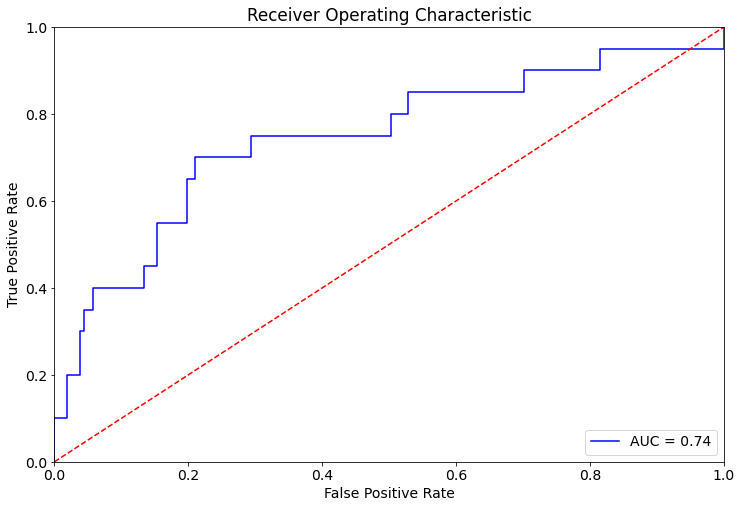

In [297]:
# method to plot AUC visually 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [298]:
r4_1= r2_score(y4_test, predictions4)
print("The R² is: " + str(r4_1))

The R² is: -0.0710191082802547


In [299]:
y_values4_1 = pd.DataFrame({'Real Values':y4_test, 'Predicted Values':predictions4})
y_values4_1

Real Values  Predicted Values
382            0                 0
324            0                 0
209            0                 0
579            0                 0
310            0                 0
..           ...               ...
4              0                 0
218            0                 0
104            1                 0
228            0                 0
78             0                 0

[177 rows x 2 columns]

### 8.4. Apply Random Forest model on the results of the Log. Regression -> better accurate score ?

- apply the Random Forest model on the results of the Log. Regression

In [300]:
regressor4 = RandomForestRegressor(n_estimators = 100, random_state = 0)
model4=regressor4.fit(X4_train,y4_train)

In [301]:
predictions_rfm_after_log_test = model4.predict(X4_test)
predictions_rfm_after_log_test

array([0.51, 0.03, 0.06, 0.01, 0.38, 0.  , 0.69, 0.88, 0.07, 0.08, 0.  ,
       0.01, 0.57, 0.27, 0.  , 0.  , 0.17, 0.  , 0.28, 0.  , 0.78, 0.01,
       0.  , 0.52, 0.  , 0.03, 0.16, 0.01, 0.1 , 0.48, 0.4 , 0.01, 0.  ,
       0.15, 0.  , 0.01, 0.04, 0.71, 0.01, 0.  , 0.08, 0.18, 0.33, 0.19,
       0.  , 0.  , 0.18, 0.63, 0.51, 0.11, 0.06, 0.01, 0.14, 0.63, 0.  ,
       0.  , 0.02, 0.01, 0.56, 0.02, 0.31, 0.01, 0.  , 0.05, 0.  , 0.  ,
       0.04, 0.  , 0.  , 0.  , 0.11, 0.01, 0.25, 0.02, 0.  , 0.04, 0.1 ,
       0.73, 0.64, 0.36, 0.02, 0.13, 0.01, 0.23, 0.01, 0.21, 0.36, 0.05,
       0.  , 0.15, 0.  , 0.18, 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.11, 0.  , 0.01, 0.15, 0.06, 0.  , 0.  , 0.  , 0.  , 0.02,
       0.  , 0.01, 0.01, 0.36, 0.  , 0.12, 0.  , 0.51, 0.15, 0.  , 0.27,
       0.18, 0.  , 0.04, 0.23, 0.04, 0.01, 0.12, 0.66, 0.27, 0.71, 0.58,
       0.38, 0.83, 0.44, 0.15, 0.  , 0.06, 0.01, 0.01, 0.02, 0.1 , 0.  ,
       0.25, 0.61, 0.05, 0.02, 0.16, 0.04, 0.12, 0.

- show the real results and the predicted results

In [302]:
y_values4 = pd.DataFrame({'Real Values':y4_test, 'Predicted Values':predictions_rfm_after_log_test})
y_values4

Real Values  Predicted Values
382            0              0.51
324            0              0.03
209            0              0.06
579            0              0.01
310            0              0.38
..           ...               ...
4              0              0.08
218            0              0.00
104            1              0.59
228            0              0.17
78             0              0.00

[177 rows x 2 columns]

- Visualization

In [303]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(max_depth=3)

In [304]:
plt.figure(figsize=(140,140))
_ = tree.plot_tree(model4.estimators_[0], feature_names=X4.columns, filled=True)

- Evaluation

In [305]:
r4= r2_score(y4_test, predictions_rfm_after_log_test)
print("The R² is: " + str(r4))

mse4 = mean_squared_error(y4_test, predictions_rfm_after_log_test)
print("The mean squared error is: " + str(mse4))

rmse4 = math.sqrt(mse4)
print("The root mean square error is: " + str(rmse4))

The R² is: 0.1494980891719745
The mean squared error is: 0.08524293785310735
The root mean square error is: 0.29196393245246466


### 8.5. Apply Book_into_movie_2021 on Random Forest model - Improvement 2

In [306]:
df_2021 = pd.read_excel(r'C:\Users\AnjaF\Desktop\My_final_project\files\Step_7_apply_NLP_and_Random_Forest\dataset_random_forest_model_2021.xlsx')

- define the variables

In [307]:
Name2021 = df_2021.Name
Author2021 = df_2021.Author
y2021 = df_2021.Book_into_Movie
X2021 = df_2021.drop(columns=["Author", "Name", "Book_into_Movie", "index", "Average"])

- scale the variables

In [308]:
X2021_scaled = scaler2.fit_transform(X2021)
X2021_scaled.shape

(21, 7)

- apply the model

In [309]:
predictions2021  = model2.predict(X2021_scaled)
predictions2021

array([0.11196299, 0.04966912, 0.05517637, 0.05517637, 0.05517637,
       0.04566429, 0.14781731, 0.63452566, 0.37619668, 0.05517637,
       0.04566429, 0.04566429, 0.19216895, 0.04566429, 0.14535646,
       0.05517637, 0.04966912, 0.11196299, 0.11196299, 0.05517637,
       0.04966912])

- Evaluation

In [310]:
mean_squared_error(y2021, predictions2021, squared = False)

0.14253128231873088

- compare real result and predictive result

In [311]:
y_values2021 = pd.DataFrame({'Real Values':y2021, 'Predicted Values':predictions2021, 'Name_of_the_book': Name2021})
y_values2021

Real Values  Predicted Values                 Name_of_the_book
0             0          0.111963                              Win
1             0          0.049669            What Happened to You?
2             0          0.055176          Walk in My Combat Boots
3             0          0.055176                 This Is the Fire
4             0          0.055176                      Think Again
5             0          0.045664                      The Russian
6             0          0.147817                The Hill We Climb
7             1          0.634526                   The Four Winds
8             0          0.376197                   The Duke and I
9             0          0.055176                 The Code Breaker
10            0          0.045664                           Sooley
11            0          0.045664                    21st Birthday
12            0          0.192169         A Court of Silver Flames
13            0          0.045664                   A Gambling Man
14            0          0.145356                    Broken Horses
15            0          0.055176  How to Avoid a Climate Disaster
16            0          0.049669                  Killing the Mob
17            0          0.111963                 Life After Death
18            0          0.111963                       Ocean Prey
19            0          0.055176                     On the House
20            0          0.049669                 Out of Many, One

- overall result: the R² is near to  -> the model ist not good to predict the target
- apply at first Logistic Regression and second apply the Random Forest leads to a higher R² (Log. Regression -0,01 and after Random Forest 0,12)

- create a new csv file with the result for the books of 2021 for Tableau

In [312]:
y_values2021.to_excel("Results_for_the_books_of_2021.xlsx")

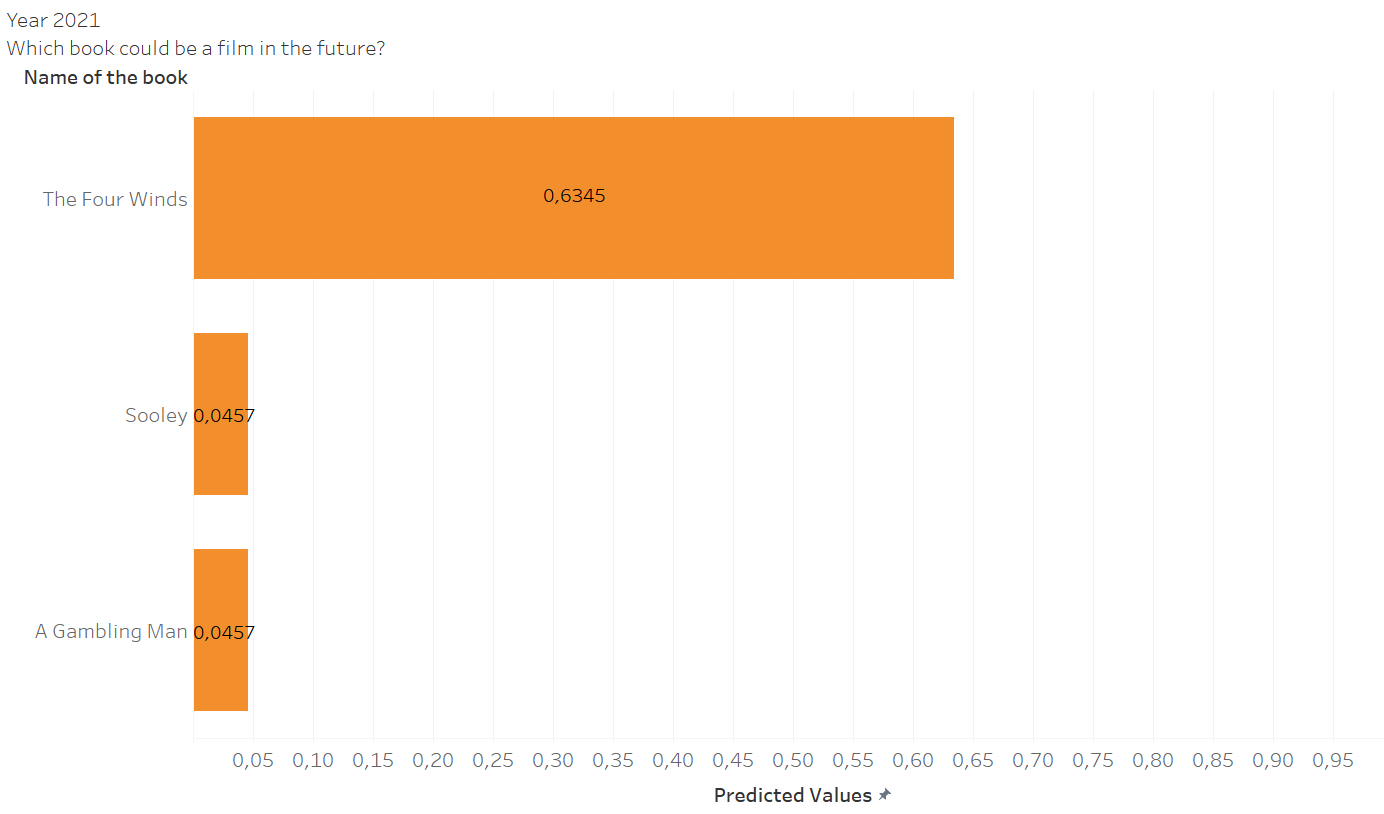